In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model


In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = r'C:\Users\nerme\Desktop\AI\CNN\DS' #location of training data
validation_data_dir = r'C:\Users\nerme\Desktop\AI\CNN\val' #location of validation data

# number of samples used for determining the samples_per_epoch
nb_train_samples = 160
nb_validation_samples = 24
batch_size = 5  

In [3]:
# on fly data agumentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,            # normalize pixel values to [0,1]
        shear_range=0.2,      
        zoom_range=0.2,    
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)  


val_datagen = ImageDataGenerator(
         rescale=1./255)       # normalize pixel values to [0,1]

#Apply generation 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 160 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [4]:
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

#model structure
classifier = Sequential()
#1st convolution layer
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#2nd convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#flatten layers
classifier.add(Flatten())
# FC layers (ANN)
classifier.add(Dense(units = 128, activation = 'relu'))
# output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [5]:

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = classifier.fit_generator(
            train_generator,
            epochs=10,
            validation_data=validation_generator)

Epoch 1/10


C:\Users\nerme\AppData\Local\Temp\ipykernel_3268\2997333581.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


32/32 [==============================] - 3s 76ms/step - loss: 0.8458 - accuracy: 0.4875 - val_loss: 0.6920 - val_accuracy: 0.3333
Epoch 2/10
32/32 [==============================] - 2s 73ms/step - loss: 0.7064 - accuracy: 0.5688 - val_loss: 0.6895 - val_accuracy: 0.2500
Epoch 3/10
32/32 [==============================] - 2s 73ms/step - loss: 0.6985 - accuracy: 0.5063 - val_loss: 0.6892 - val_accuracy: 0.5417
Epoch 4/10
32/32 [==============================] - 2s 71ms/step - loss: 0.6799 - accuracy: 0.5125 - val_loss: 0.6834 - val_accuracy: 0.5833
Epoch 5/10
32/32 [==============================] - 2s 72ms/step - loss: 0.6837 - accuracy: 0.5750 - val_loss: 0.6651 - val_accuracy: 0.6250
Epoch 6/10
32/32 [==============================] - 2s 73ms/step - loss: 0.6604 - accuracy: 0.6062 - val_loss: 0.6713 - val_accuracy: 0.6667
Epoch 7/10
32/32 [==============================] - 2s 72ms/step - loss: 0.6843 - accuracy: 0.5562 - val_loss: 0.6640 - val_accuracy: 0.5417
Epoch 8/10
32/32 [======

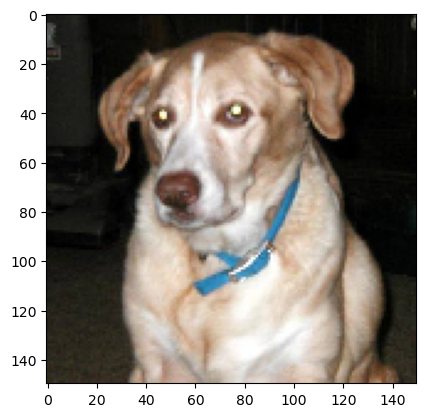

1/1 [==============================] - 0s 80ms/step
Predicted: [[0.9999906]] dog


In [6]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

# dimensions of our images.
img_width, img_height = 150, 150

img_path = r'C:\Users\nerme\Desktop\AI\CNN\dog.jpg'  # change to location of chest x-ray
img = keras.utils.load_img(img_path, target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
img = keras.utils.img_to_array(img)
x = np.expand_dims(img, axis=0)
score = classifier.predict(x)
print('Predicted:', score, 'cat' if score < 0.5 else 'dog')